# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [22]:
import matplotlib
matplotlib.__version__

'3.3.4'

In [23]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

import numpy as np

In [24]:
file = 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv'
df = pd.read_csv(file)
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [25]:
df['Date'] = pd.to_datetime(df['Date'])
# sort by datetime
df = df.sort_values(by="Date")

In [26]:
xdf = df.copy()

In [27]:
xdf['day'] = xdf['Date'].dt.day
xdf['month'] = xdf['Date'].dt.month
xdf['year'] = xdf['Date'].dt.year

In [28]:
xdf.head()

,ID,Date,Element,Data_Value,day,month,year
60995,USW00004848,2005-01-01,TMIN,0,1,1,2005
17153,USC00207320,2005-01-01,TMAX,150,1,1,2005
17155,USC00207320,2005-01-01,TMIN,-11,1,1,2005
10079,USW00014833,2005-01-01,TMIN,-44,1,1,2005
10073,USW00014833,2005-01-01,TMAX,33,1,1,2005


# Data preprocessing

In [29]:
# split 2015 and other data
xdf15 = xdf[xdf['year']==2015]
xdf = xdf[xdf['year']!=2015]

In [30]:
# Split the data into max min
mindf = xdf[xdf['Element'] == 'TMIN']
maxdf = xdf[xdf['Element'] == 'TMAX']

# set index
mindf = mindf.set_index(['month','day'])
maxdf = maxdf.set_index(['month','day'])

In [31]:
# split 2015 data into max min

mindf15 = xdf15[xdf15['Element'] == 'TMIN']
maxdf15 = xdf15[xdf15['Element'] == 'TMAX']

# set index
mindf15 = mindf15.set_index(['month','day'])
maxdf15 = maxdf15.set_index(['month','day'])

In [32]:
# normal data
minyvalues = []
for group,frame in mindf.groupby(level=(0,1)):
    val = np.min(frame['Data_Value'])
#     print(group, val)
    if group == (2,29):
        print('DANGER')
    else:
        minyvalues.append(val)

DANGER


In [33]:
# normal data

maxyvalues = []
for group,frame in mindf.groupby(level=(0,1)):
    val = np.max(frame['Data_Value'])
#     print(group, val)
    if group == (2,29):
        print('DANGER')
    else:
        maxyvalues.append(val)

DANGER


In [34]:
# 2015 data
minyvalues15 = []
for group,frame in mindf15.groupby(level=(0,1)):
    val = np.min(frame['Data_Value'])
#     print(group, val)
    if group == (2,29):
        print('DANGER')
    else:
        minyvalues15.append(val)

In [35]:
# 2015 data
maxyvalues15 = []
for group,frame in maxdf15.groupby(level=(0,1)):
    val = np.min(frame['Data_Value'])
#     print(group, val)
    if group == (2,29):
        print('DANGER')
    else:
        maxyvalues15.append(val)

# Find record broken in 2015

In [36]:
index = 0
scatminy = []
scatminx = []
for a,b in zip(minyvalues,minyvalues15):
    if b < a:
        scatminy.append(b)
        scatminx.append(index)
    index+=1

In [37]:
index = 0
scatmaxy = []
scatmaxx = []
for a,b in zip(maxyvalues,maxyvalues15):
    if b > a:
        scatmaxy.append(b)
        scatmaxx.append(index)
    index+=1

# Let's plot

In [38]:
%matplotlib notebook

<IPython.core.display.Javascript object>


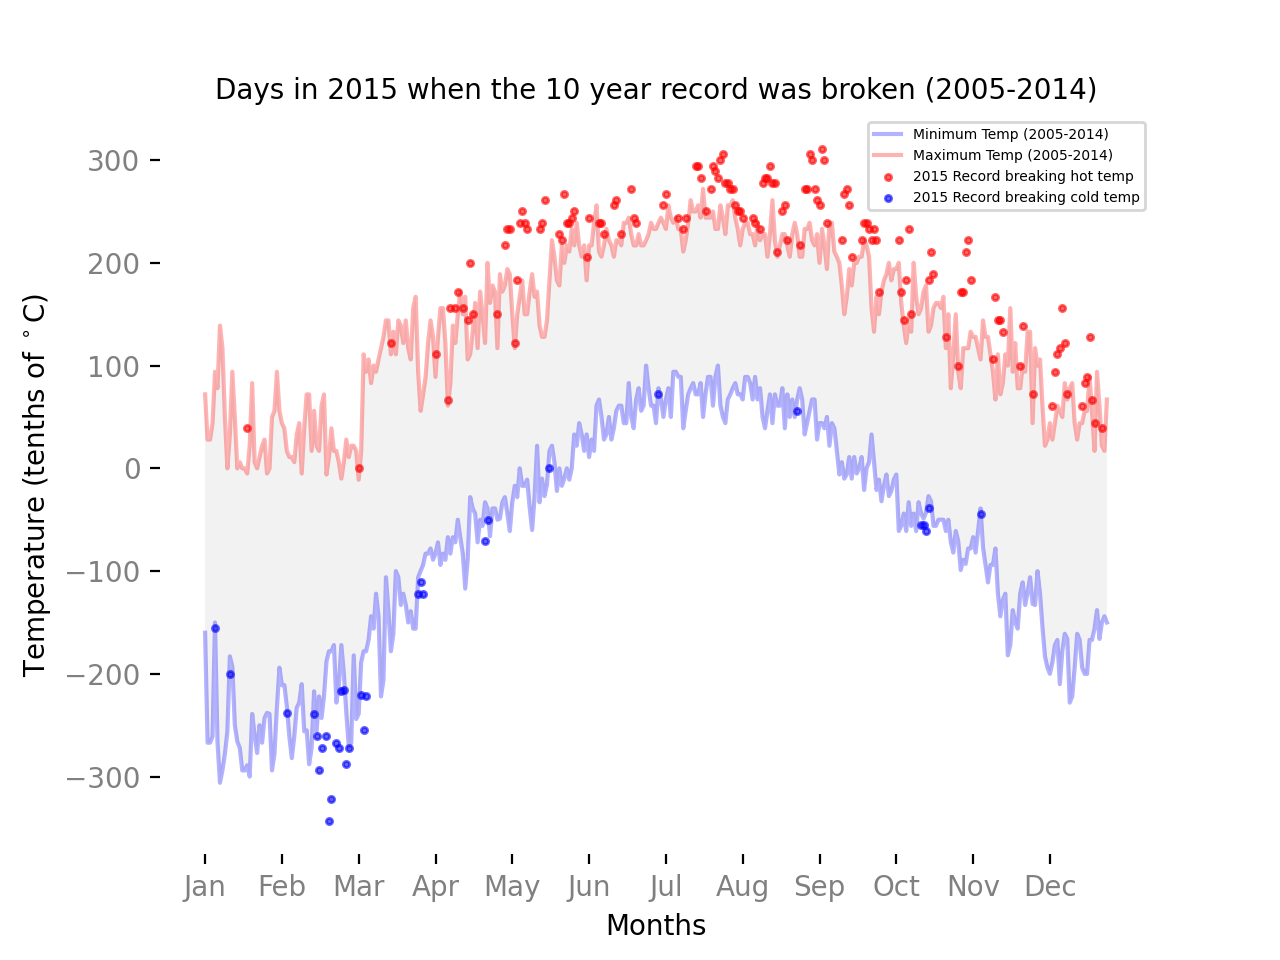

In [39]:
plt.figure()



plt.plot(minyvalues,'-r',color='blue',alpha=0.3)
plt.plot(maxyvalues,'-r',color='red',alpha=0.3)

xtic = []
i = 0
for a in range(0,12):
    xtic.append((i+31*a))

plt.box(False)
    
locs,labels = plt.xticks()

# plt.xticks(np.arange(13))
plt.yticks(color='grey')
plt.xticks(xtic,('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), color='grey')

plt.scatter(scatmaxx,scatmaxy,s=5,color='red',alpha=0.6)

plt.scatter(scatminx,scatminy,s=5,color='blue',alpha=0.6)


plt.xlabel('Months',fontsize=10)
plt.ylabel('Temperature (tenths of $^\circ$C)',fontsize=10)
plt.title('Days in 2015 when the 10 year record was broken (2005-2014)',fontsize=10)
plt.legend(['Minimum Temp (2005-2014)','Maximum Temp (2005-2014)','2015 Record breaking hot temp','2015 Record breaking cold temp'],prop={'size':5})

# fill between function for area highlighting
plt.gca().fill_between(range(len(minyvalues)),
                      minyvalues, maxyvalues, 
                      facecolor ='grey',
                      alpha=0.1)

plt.savefig('TemperatureRecord.jpg')